In [402]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks")


In [403]:
file_name = 'X:/iris.data'
dataset = pd.read_csv(file_name, delimiter=',', names=['sepal length', 'sepal width', \
                                                       'petal length', "petal width",
                                                      'Species'])

dataset.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [404]:
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [405]:
dataset.isnull().any().sum()

0

In [406]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [407]:
dataset.shape

(150, 5)

In [408]:
y = [col for col in dataset.columns.to_list() if col.startswith(('petal','sepal'))]

In [409]:
y

['sepal length', 'sepal width', 'petal length', 'petal width']

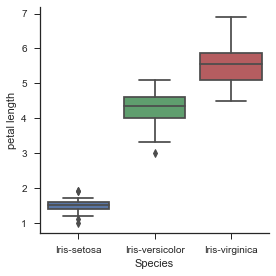

In [410]:
sns.factorplot(x='Species',y='petal length',data =  dataset,kind='box')

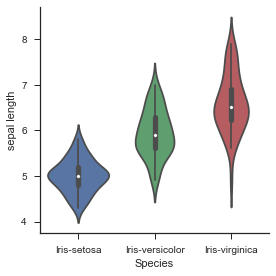

In [411]:
sns.factorplot(x='Species',y='sepal length',data =  dataset,kind='violin')

In [412]:
X=dataset.iloc[:,:-1].values

In [413]:
y = dataset.iloc[:,-1].values

In [414]:
print('\nIndependent Variable(Sepal and petal attribute):\n\n',X[:5])
print('\Dependent Variable(Species):\n\n',y[:5])



Independent Variable(Sepal and petal attribute):

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
\Dependent Variable(Species):

 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [415]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Species'] = labelencoder.fit_transform(dataset['Species'])

In [416]:
dataset['Species'].unique()

array([0, 1, 2], dtype=int64)

In [417]:
from sklearn.model_selection import train_test_split

In [418]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 0)

In [419]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
y = 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


Test Set :
----------------

X = 
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y = 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


In [420]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (120, 4)
Shape of Testing set is (30, 4)


In [421]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [422]:
print('After Scaling')
print('\nX_train : \n',X_train[:5])
print('-------------------------------------')
print('\nX_test : \n',X_test[:5])

After Scaling

X_train : 
 [[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]]
-------------------------------------

X_test : 
 [[ 0.14956537 -0.58304897  0.94512598  1.91948971]
 [ 0.43000045 -1.9460206   0.2829358  -0.10102577]
 [-0.27108724  2.59721815 -1.28224097 -1.25560605]
 [ 2.25282843 -0.35588703  1.66751526  1.0535545 ]
 [-0.97217492  0.77992265 -1.22204187 -1.25560605]]


In [423]:
from sklearn.linear_model import LogisticRegression

In [279]:
lr =LogisticRegression(max_iter=2000,penalty='l2',solver='saga')

In [280]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [281]:
y_pred = lr.predict(X_test)

In [282]:
print("\n---------------------------\n")
print('Prediction Value:\n ',y_pred)
print("\n---------------------------\n")
print('\nActual Value : \n',y_test)


---------------------------

Prediction Value:
  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']

---------------------------


Actual Value : 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-vi

In [283]:
from sklearn import metrics

In [284]:
print("prediction Accuracy = ",metrics.accuracy_score(y_test,y_pred))

prediction Accuracy =  0.7666666666666667


In [285]:
compare = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [286]:
compare

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-virginica
8,Iris-versicolor,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [287]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.7666666666666667

---------------------------

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.46      0.63        13
 Iris-virginica       0.46      1.00      0.63         6

    avg / total       0.89      0.77      0.77        30



In [288]:
from sklearn.neighbors import KNeighborsClassifier


In [289]:
knn = KNeighborsClassifier(n_neighbors=4)

In [290]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [291]:
y_pred = knn.predict(X_test)

In [292]:
print(y_pred,y_test)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa'] ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [293]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df

Prediction Accuracy =  0.9

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [294]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.9

---------------------------

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

    avg / total       0.93      0.90      0.90        30



In [295]:
from sklearn.svm import SVC

In [380]:
classifier = SVC(C=35,kernel='poly')

In [381]:
classifier.fit(X_train,y_train)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [382]:
y_pred = classifier.predict(X_test)

In [383]:
y_pred,y_test

(array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa'], dtype=object),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-s

In [384]:
from sklearn import metrics


In [385]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [386]:
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df


Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [387]:
from sklearn.metrics import classification_report,confusion_matrix

In [388]:
cm =confusion_matrix(y_test,y_pred)

In [389]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

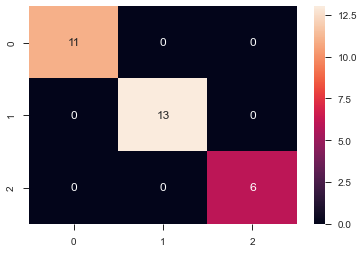

In [390]:
sns.heatmap(cm, annot=True)
plt.show()

In [391]:
accuracy = cm.diagonal().sum()/cm.sum()

In [392]:
accuracy

1.0

In [393]:
print('classification_report',classification_report(y_test,y_pred))

classification_report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30



In [448]:
    from sklearn.naive_bayes import GaussianNB

In [452]:
gnb = GaussianNB()

In [453]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [454]:
y_pred = gnb.predict(X_test)

In [455]:
y_pred,y_test

(array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa'], dtype='<U15'),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'

In [456]:
from sklearn import metrics

In [457]:
metrics.accuracy_score(y_test,y_pred)

0.8

In [458]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.8

---------------------------

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.54      0.70        13
 Iris-virginica       0.50      1.00      0.67         6

    avg / total       0.90      0.80      0.80        30



In [459]:
from sklearn.ensemble import GradientBoostingClassifier

In [526]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=50,min_samples_split=10)

In [527]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=50,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [528]:
y_pred = gbc.predict(X_test)

In [529]:
y_pred,y_test

(array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-setosa'], dtype=object),
 array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
        'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-set

In [530]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df

Prediction Accuracy =  0.9333333333333333

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-virginica
9,Iris-versicolor,Iris-versicolor


In [531]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.9333333333333333

---------------------------

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

    avg / total       0.95      0.93      0.94        30

